In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
print(df['Alley'].isnull().all())

False


In [5]:
count = 0
for value in df['Alley']:
    if not pd.isna(value):
        count += 1
print(count)

91


In [6]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

***Since I am not affiliated with real state I will use ai here to understand what these columns***

* There are a lot of columns here hence we will start from the heay hitters first
* **OverallQual**: Gives the overall quality of the house
* **GrLiveArea**: Above ground living area
* **TotalBsmtSF**: Total basement area
* **YearBuilt**: date of construction
* **FullBath**: full bathroom above ground

**Yes there are other variables also but we will start from these**

In [8]:
df_hevyhit = df[['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'FullBath','SalePrice']]
df_hevyhit.head()

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,FullBath,SalePrice
0,7,1710,856,2003,2,208500
1,6,1262,1262,1976,2,181500
2,7,1786,920,2001,2,223500
3,7,1717,756,1915,1,140000
4,8,2198,1145,2000,2,250000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

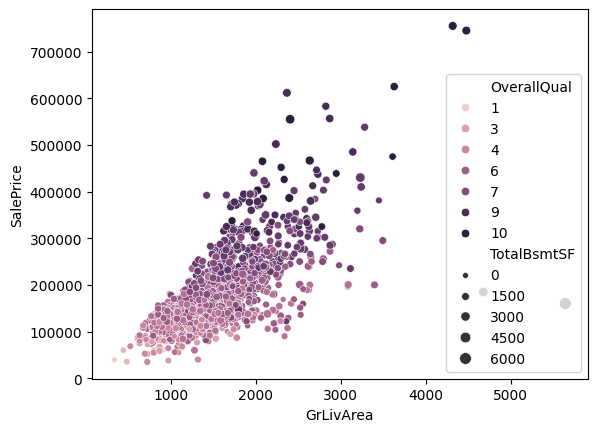

In [9]:
sns.scatterplot(df_hevyhit, x='GrLivArea', y = 'SalePrice', size= 'TotalBsmtSF',hue = 'OverallQual')

In [10]:
df_hevyhit.isnull().sum()

OverallQual    0
GrLivArea      0
TotalBsmtSF    0
YearBuilt      0
FullBath       0
SalePrice      0
dtype: int64

You can see all these variables(taken together) have a kind of linear relationship with the saleprice

**Finding Outliers**

<Axes: ylabel='SalePrice'>

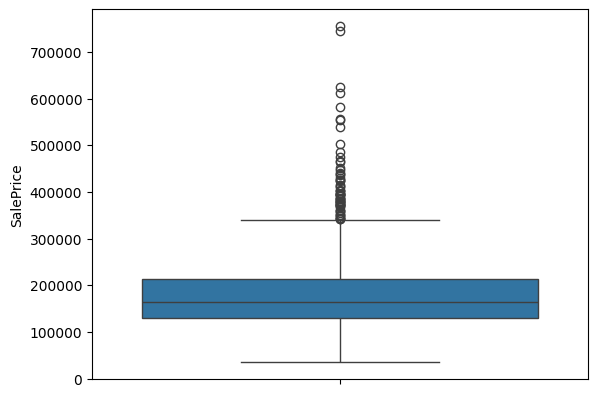

In [11]:
sns.boxplot(df_hevyhit, y='SalePrice')

In [12]:
df_hevyhit_sl = df_hevyhit.loc[df['SalePrice']>450000]

In [13]:
df_hevyhit_sl

,OverallQual,GrLivArea,TotalBsmtSF,YearBuilt,FullBath,SalePrice
178,9,2234,2216,2008,2,501837
185,10,3608,1107,1892,2,475000
440,10,2402,3094,2008,2,555000
591,10,2296,1722,2008,2,451950
691,10,4316,2444,1994,3,755000
769,8,3279,1650,2003,3,538000
798,9,3140,1926,2008,3,485000
803,9,2822,1734,2008,3,582933
898,9,2364,2330,2009,2,611657
1046,9,2868,1992,2005,3,556581


**Cleaning the original data**

In [14]:
# to show all the data
with pd.option_context('display.max_rows', None):
    print(df.isnull().sum())


Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

We can see that PoolQc, Misc Feature, alley and fence are mostly null

In [15]:
# we will drop pool qual ,misc feature ,Alley cuz the remainig data is too small to infer anything
# removing poolqc
df = df.drop(['PoolQC', 'MiscFeature', 'Alley'],axis = 1)

In [16]:
df = df.drop('Fence', axis = 1)
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [17]:
import math
# # Now we will handle the columns which have lesser number of null value
Lot_mean_value = math.floor(df['LotFrontage'].median())
df['LotFrontage'] = df['LotFrontage'].fillna(Lot_mean_value)

In [18]:
df['LotFrontage'].isnull().sum()

np.int64(0)

# Caliberating Whole Basement Data

In [19]:
# Ex	Excellent (100+ inches)	
#        Gd	Good (90-99 inches)
#        TA	Typical (80-89 inches)
#        Fa	Fair (70-79 inches)
#        Po	Poor (<70 inches
#        NA	No Basement
dict_BsmtQual = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
}

# apply() method struggles with NaN values so use map()
df['BsmtQual'] = df['BsmtQual'].map(dict_BsmtQual)
BsmtQual_mode_value = df['BsmtQual'].mode()[0]
df['BsmtQual'] = df['BsmtQual'].fillna(BsmtQual_mode_value)

In [20]:
#BsmtCond
dict_BsmtCond = {
    'Ex' : 5,
    'Gd' : 4,
    'TA' : 3,
    'Fa' : 2,
    'Po' : 1,
}
df['BsmtCond'] = df['BsmtCond'].map(dict_BsmtCond)
BsmtCond_mode_value = df['BsmtCond'].mode()[0]
df['BsmtCond'] = df['BsmtCond'].fillna(BsmtCond_mode_value)

#BsmtExposure
       # Gd	Good Exposure
       # Av	Average Exposure (split levels or foyers typically score average or above)	
       # Mn	Mimimum Exposure
       # No	No Exposure
       # NA	No Basement
dict_BsmtExposure = {
    'Gd':4,
    'Av':3,
    'Mn':2,
    'No':1
}
df['BsmtExposure'] = df['BsmtExposure'].map(dict_BsmtExposure)
BsmtExposure_mode_value = df['BsmtExposure'].mode()[0]
df['BsmtExposure'] = df['BsmtExposure'].fillna(BsmtExposure_mode_value)


#BsmtFinType1
       # GLQ	Good Living Quarters
       # ALQ	Average Living Quarters
       # BLQ	Below Average Living Quarters	
       # Rec	Average Rec Room
       # LwQ	Low Quality
       # Unf	Unfinshed
       # NA	No Basement
dict_BsmtFinType1 = {
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1
}
df['BsmtFinType1'] = df['BsmtFinType1'].map(dict_BsmtFinType1)
BsmtFinType1_mode_value = df['BsmtFinType1'].mode()[0]
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(BsmtFinType1_mode_value)


#BsmtFinType2
       # GLQ	Good Living Quarters
       # ALQ	Average Living Quarters
       # BLQ	Below Average Living Quarters	
       # Rec	Average Rec Room
       # LwQ	Low Quality
       # Unf	Unfinshed
       # NA	No Basement
dict_BsmtFinType2 = {
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1
}
df['BsmtFinType2'] = df['BsmtFinType2'].map(dict_BsmtFinType2)
BsmtFinType2_mode_value = df['BsmtFinType2'].mode()[0]
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(BsmtFinType2_mode_value)

**We have take care of whole null of basement data now we will shorten the data**

In [21]:
dict_BsmtHalfBath = {
    1 : 0.5
}
df['BsmtHalfBath'] = df['BsmtHalfBath'].map(dict_BsmtHalfBath)
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(0)

In [22]:
df['BsmtHalfBath']


0       0.0
1       0.5
2       0.0
3       0.0
4       0.0
       ... 
1455    0.0
1456    0.0
1457    0.0
1458    0.0
1459    0.0
Name: BsmtHalfBath, Length: 1460, dtype: float64

***Now we will condense the whole basement into two columns into a new dataframe and see if there is a relation between them and sale price***

In [23]:
#double column to make sure df_final is a dataframe
df_final = df[['SalePrice']].copy()  #Use copy here to make sure the new dataframe is made
df_final['BsmtOverallQual'] = df['BsmtCond']*15 + df['BsmtQual']*20 #+ df['BsmtFullBath']*20 + df['BsmtHalfBath']*15 #+ df['BsmtFinType1']*3 + df["BsmtFinType2"]*2

In [24]:
df_final

,SalePrice,BsmtOverallQual
0,208500,125.0
1,181500,125.0
2,223500,125.0
3,140000,120.0
4,250000,125.0
...,...,...
1455,175000,125.0
1456,210000,125.0
1457,266500,120.0
1458,142125,105.0


<Axes: xlabel='SalePrice', ylabel='BsmtOverallQual'>

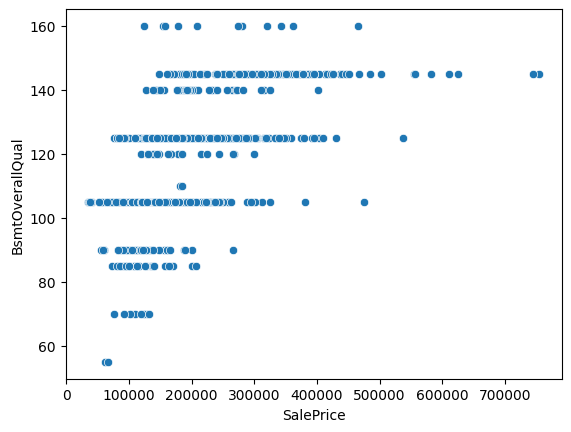

In [25]:
sns.scatterplot(df_final, x = 'SalePrice', y = 'BsmtOverallQual')

In [26]:
correlation = df_final[['BsmtOverallQual','SalePrice']].corr()['SalePrice'][0]
correlation

/tmp/ipykernel_17/3049733240.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlation = df_final[['BsmtOverallQual','SalePrice']].corr()['SalePrice'][0]


np.float64(0.6312359312525972)

In [27]:
correlationdf = df[['BsmtQual','SalePrice']].corr()['SalePrice'][0]
correlationdf

/tmp/ipykernel_17/384440574.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  correlationdf = df[['BsmtQual','SalePrice']].corr()['SalePrice'][0]


np.float64(0.6501380175698022)

# We can see that overall quality is not a good correlation with saleprice but only BsmtQual has much better correlation
# Now we will see the correlaion between bsmt area and price

<Axes: xlabel='SalePrice', ylabel='Bsmt_area'>

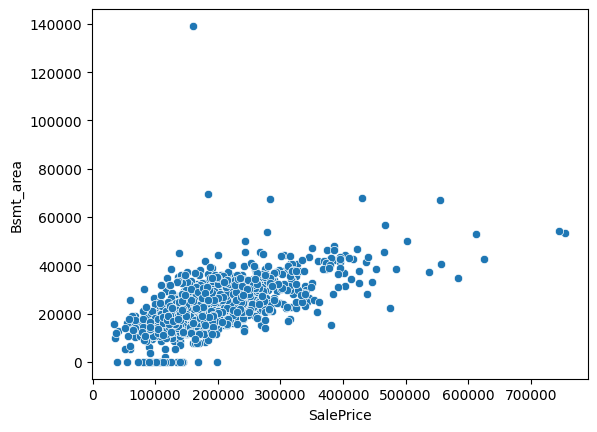

In [28]:
df_final['Bsmt_area'] = 20 *df['TotalBsmtSF'] + 3*df['BsmtFinSF1']# - 3*df['BsmtUnfSF']
sns.scatterplot(df_final, x = 'SalePrice', y = 'Bsmt_area')

In [29]:
corrSaleArea = df_final[['Bsmt_area','SalePrice']].corr()['SalePrice'][0]
corrSaleArea

/tmp/ipykernel_17/1744896782.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  corrSaleArea = df_final[['Bsmt_area','SalePrice']].corr()['SalePrice'][0]


np.float64(0.6184240929342005)

This is the best correlation i can cameup with

In [30]:
df_final = df_final.drop('BsmtOverallQual', axis = 1)

In [31]:
df_final['BsmtQual'] = df['BsmtQual']
df_final.head()

,SalePrice,Bsmt_area,BsmtQual
0,208500,19238,4.0
1,181500,28174,4.0
2,223500,19858,4.0
3,140000,15768,3.0
4,250000,24865,4.0


In [32]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

In [33]:
df_utilities = {
    'AllPub' : 10,
    'NoSewr' : 6,
    'NoSeWa' : 4,
    'ELO' : 1
}
df['Utilities'] = df['Utilities'].map(df_utilities)
corr_uti = df[['Utilities','SalePrice']].corr()['SalePrice'].iloc[0]


In [34]:
#No correlation between utilities and the saleprice Now we will consider the overall qual and overall conditiion
corr_over = df[['OverallCond','SalePrice']].corr()['SalePrice'].iloc[0]
corr_over

np.float64(-0.07785589404867797)

***But isn't it counterintuitive this is because condition tell us about the how the house is kept and it is basically a ushaped curve cuz it depends on various factro likle age and investor or things. In the case of quality it tells about the material used and how the house is built. while in the case of utilities if you look at the data almost all the columns are 'AllPub' hence it doesn't really tell us anything.***

In [35]:
#hence we will add overall condition
df_final['OverallQual'] = df['OverallQual']
df_final.head()

,SalePrice,Bsmt_area,BsmtQual,OverallQual
0,208500,19238,4.0,7
1,181500,28174,4.0,6
2,223500,19858,4.0,7
3,140000,15768,3.0,7
4,250000,24865,4.0,8


# Now let's look at the age
* Here YearBuilt is kind of redundant cuz YearRemodAdd literally exists
* and we will use year sold to find the age of the house
* we will not use monthsold now cuz it's kind of a categorical data hence it will be used lateer

In [36]:
df_final['HouseAge'] = -(df['YrSold'] - df['YearBuilt'])
corr_age = df_final[['HouseAge','SalePrice']].corr()['SalePrice'].iloc[0]
corr_age

np.float64(0.5233504175468151)

In [37]:
df_final.head()

,SalePrice,Bsmt_area,BsmtQual,OverallQual,HouseAge
0,208500,19238,4.0,7,-5
1,181500,28174,4.0,6,-31
2,223500,19858,4.0,7,-7
3,140000,15768,3.0,7,-91
4,250000,24865,4.0,8,-8


<Axes: xlabel='SalePrice', ylabel='HouseAge'>

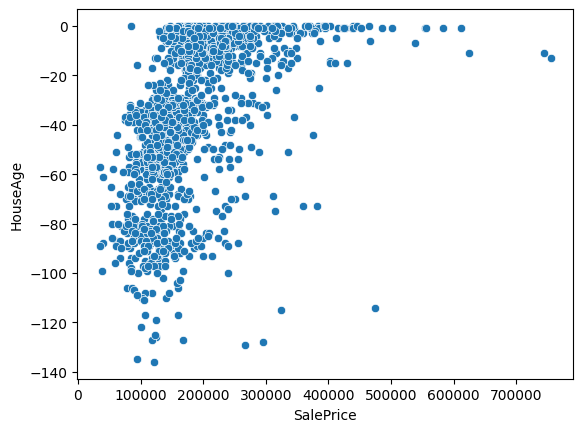

In [38]:
sns.scatterplot(df_final, x= 'SalePrice', y = 'HouseAge')

In [39]:
df_final['Bath'] =   df['FullBath'] + 0.5*df['HalfBath']
corr_room = df_final[['Bath', 'SalePrice']].corr()["SalePrice"].iloc[0]
corr_room

np.float64(0.5979656210064274)

In [40]:
dict_kitchenqual = {
    'Ex' : 4,
    'Gd' : 3,
    'TA' : 2,
    'Fa' : 1,
    'Po' : 0
}
df['KitchenQual'] = df['KitchenQual'].map(dict_kitchenqual)
corr_kitchenqual = df[['KitchenQual','SalePrice']].corr()['SalePrice'].iloc[0]
corr_kitchenqual

np.float64(0.6595997207286626)

In [41]:
#due to high correlation of kitchen qual we are taking it also
df_final['KitchenQual'] = df['KitchenQual']
df_final.head()

,SalePrice,Bsmt_area,BsmtQual,OverallQual,HouseAge,Bath,KitchenQual
0,208500,19238,4.0,7,-5,2.5,3
1,181500,28174,4.0,6,-31,2.0,2
2,223500,19858,4.0,7,-7,2.5,3
3,140000,15768,3.0,7,-91,1.0,3
4,250000,24865,4.0,8,-8,2.5,3


In [42]:
df_final['TotalRooms'] = df_final['Bath'] + df['TotRmsAbvGrd']
corr_roomno = df_final[['TotalRooms','SalePrice']].corr()['SalePrice'].iloc[0]
corr_roomno

np.float64(0.6003123118301887)

In [43]:
df_final = df_final.drop('Bath', axis = 1)

In [44]:
df_final.head()

,SalePrice,Bsmt_area,BsmtQual,OverallQual,HouseAge,KitchenQual,TotalRooms
0,208500,19238,4.0,7,-5,3,10.5
1,181500,28174,4.0,6,-31,2,8.0
2,223500,19858,4.0,7,-7,3,8.5
3,140000,15768,3.0,7,-91,3,8.0
4,250000,24865,4.0,8,-8,3,11.5


In [45]:
dict_electrical = {
    'SBrkr' : 4,
    'FuseA' : 3,
    'FuseF' : 2,
    'FuseP' : 1,
    'Mixed' : 2.5
}
df['Electrical'] = df['Electrical'].map(dict_electrical)

In [46]:
corr_electrical = df[['Electrical','SalePrice']].corr()['SalePrice'].iloc[0]
corr_electrical

np.float64(0.23191221653488212)

In [47]:
dict_HeatingQC = {
    'Ex' : 4,
    'Gd' : 3,
    'TA' : 2,
    'Fa' : 1,
    'Po' : 0
}
dict_CentralAir = {
    'Y' : 1,
    'N' : 0
}
df['HeatingQC'] = df['HeatingQC'].map(dict_HeatingQC)
df['CentralAir'] = df['CentralAir'].map(dict_CentralAir)

In [48]:
df_final['HeatCond'] = df['HeatingQC'] 
corr_heatcond = df_final[['HeatCond', 'SalePrice']].corr()['SalePrice'].iloc[0]

In [49]:
corr_heatcond

np.float64(0.42764870739880345)